In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import glob

from scripts.my_camera_cal import readValuesToUndistort
from scripts.my_camera_cal import unwarp

from scripts.my_pipeline import pipeline
from scripts.my_camera_cal import image_perspective

from scripts.my_line_finding import fit_polynomial
from scripts.my_line_finding import search_around_poly

from scripts.my_process import back_to_world
from scripts.my_process import process
from scripts.my_process import process2
from scripts.my_process import measure_curvature_pixels

In [2]:
mtx,dist=readValuesToUndistort("config/myvalues_to_undistort.p")

In [3]:
# Make a list of test images
images = glob.glob('../test_images/*.jpg')
print(images)

['../test_images\\harder1.jpg', '../test_images\\straight_lines1.jpg', '../test_images\\straight_lines2.jpg', '../test_images\\test1.jpg', '../test_images\\test2.jpg', '../test_images\\test3.jpg', '../test_images\\test4.jpg', '../test_images\\test5.jpg', '../test_images\\test6.jpg']


In [4]:
# Define conversions in x and y from pixels space to meters
ym_per_pix = 30/720 # meters per pixel in y dimension
xm_per_pix = 3.7/700 # meters per pixel in x dimension

In [5]:
def calc_vehicle_pos(image,ll_f,rr_f,m_per_pix):
    middle=image.shape[1]//2
    y=image.shape[0]
    
    xleft = ll_f[0] * (y**2) + ll_f[1]* y + ll_f[2]
    xright = rr_f[0] * (y**2) + rr_f[1]* y + rr_f[2]
    x_vehicle=  xleft + (xright - xleft) // 2
    
    position=(x_vehicle-middle)*m_per_pix
    
    return position

# Performing Processing for each picture

## 1. test1.jpg

### Sliding Windows

[ 1.43839564e-04 -1.75141350e-01  4.12703644e+02] [ 3.21500626e-05 -1.75889040e-01  1.10493574e+03]


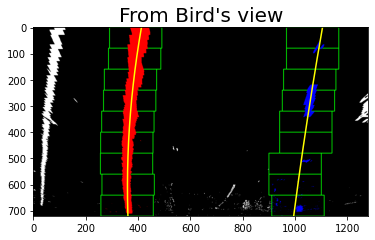

In [6]:
imageF=mpimg.imread('../test_images/test1.jpg')
ll_f,rr_f,poly_img,final_img=process2(imageF,mtx,dist)
print(ll_f,rr_f)
plt.title("From Bird's view", fontsize=20)
plt.imshow(poly_img)

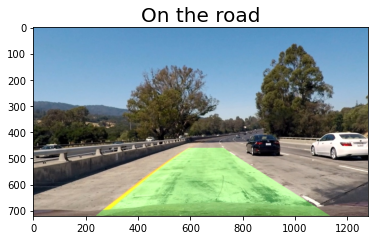

In [7]:
plt.title("On the road", fontsize=20)
plt.imshow(final_img)

In [8]:
left_curverad,right_curverad=measure_curvature_pixels(ll_f,rr_f,imageF.shape[0])
print("Curvature in pixels:")
print("Left: ",left_curverad)
print("Right: ", right_curverad)

Curvature in pixels:
Left:  3481.431590187545
Right:  15945.489550657267


In [9]:
car_pos=calc_vehicle_pos(imageF,ll_f,rr_f,xm_per_pix)
print("The positon of the car is: ",car_pos," m")

The positon of the car is:  0.196461022922517  m


### From Prior data

[ 1.43839564e-04 -1.75141350e-01  4.12703644e+02] [ 3.21500626e-05 -1.75889040e-01  1.10493574e+03]


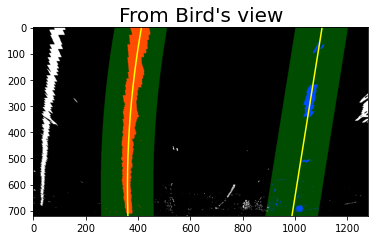

In [10]:
imageF=mpimg.imread('../test_images/test1.jpg')
ll_f,rr_f,poly_img,final_img=process2(imageF,mtx,dist,l_fit=ll_f,r_fit=rr_f)
print(ll_f,rr_f)
plt.title("From Bird's view", fontsize=20)
plt.imshow(poly_img)

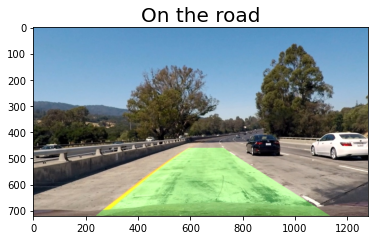

In [11]:
plt.title("On the road", fontsize=20)
plt.imshow(final_img)

In [12]:
left_curverad,right_curverad=measure_curvature_pixels(ll_f,rr_f,imageF.shape[0])
print("Curvature in pixels:")
print("Left: ",left_curverad)
print("Right: ", right_curverad)

Curvature in pixels:
Left:  3481.431590187545
Right:  15945.489550657267


In [13]:
car_pos=calc_vehicle_pos(imageF,ll_f,rr_f,xm_per_pix)
print("The positon of the car is: ",car_pos," m")

The positon of the car is:  0.196461022922517  m


## 2. test2.jpg

### Sliding Windows

[-2.06014798e-04  3.00151806e-01  2.86603428e+02] [-3.20495194e-04  3.32097571e-01  9.33805210e+02]


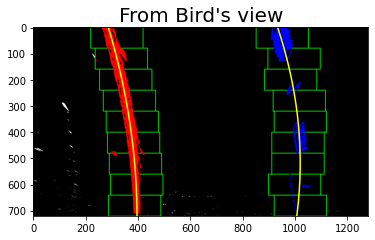

In [14]:
imageF=mpimg.imread('../test_images/test2.jpg')
ll_f,rr_f,poly_img,final_img=process2(imageF,mtx,dist)
print(ll_f,rr_f)
plt.title("From Bird's view", fontsize=20)
plt.imshow(poly_img)

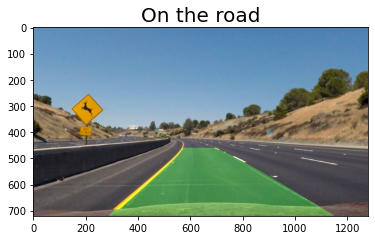

In [15]:
plt.title("On the road", fontsize=20)
plt.imshow(final_img)

In [16]:
left_curverad,right_curverad=measure_curvature_pixels(ll_f,rr_f,imageF.shape[0])
print("Curvature in pixels:")
print("Left: ",left_curverad)
print("Right: ", right_curverad)

Curvature in pixels:
Left:  2427.054479877668
Right:  1599.4427975002907


In [17]:
car_pos=calc_vehicle_pos(imageF,ll_f,rr_f,xm_per_pix)
print("The positon of the car is: ",car_pos," m")

The positon of the car is:  0.32197747151995487  m


### From Prior data

[-2.06014798e-04  3.00151806e-01  2.86603428e+02] [-3.20495194e-04  3.32097571e-01  9.33805210e+02]


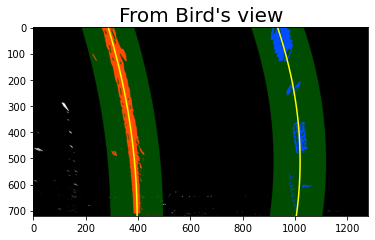

In [18]:
ll_f,rr_f,poly_img,final_img=process2(imageF,mtx,dist,l_fit=ll_f,r_fit=rr_f)
print(ll_f,rr_f)
plt.title("From Bird's view", fontsize=20)
plt.imshow(poly_img)

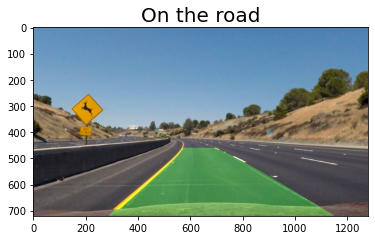

In [19]:
plt.title("On the road", fontsize=20)
plt.imshow(final_img)

In [20]:
left_curverad,right_curverad=measure_curvature_pixels(ll_f,rr_f,imageF.shape[0])
print("Curvature in pixels:")
print("Left: ",left_curverad)
print("Right: ", right_curverad)

Curvature in pixels:
Left:  2427.054479877668
Right:  1599.4427975002907


In [21]:
car_pos=calc_vehicle_pos(imageF,ll_f,rr_f,xm_per_pix)
print("The positon of the car is: ",car_pos," m")

The positon of the car is:  0.32197747151995487  m


## 3. test3.jpg

### Sliding Windows

[ 1.04281750e-04 -2.51761153e-01  4.82353951e+02] [ 1.42516434e-04 -2.71289163e-01  1.12522070e+03]


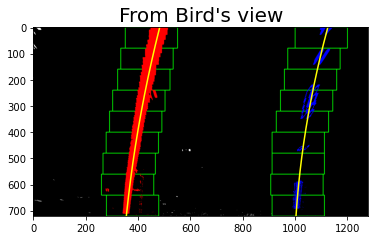

In [22]:
imageF = mpimg.imread('../test_images/test3.jpg')
ll_f,rr_f,poly_img,final_img=process2(imageF,mtx,dist)
print(ll_f,rr_f)
plt.title("From Bird's view", fontsize=20)
plt.imshow(poly_img)

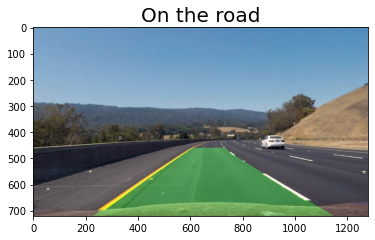

In [23]:
plt.title("On the road", fontsize=20)
plt.imshow(final_img)

In [24]:
left_curverad,right_curverad=measure_curvature_pixels(ll_f,rr_f,imageF.shape[0])
print("Curvature in pixels:")
print("Left: ",left_curverad)
print("Right: ", right_curverad)

Curvature in pixels:
Left:  4869.127776069533
Right:  3531.3615598723813


In [25]:
car_pos=calc_vehicle_pos(imageF,ll_f,rr_f,xm_per_pix)
print("The positon of the car is: ",car_pos," m")

The positon of the car is:  0.20691235193902083  m


### From Prior data

[ 1.04281750e-04 -2.51761153e-01  4.82353951e+02] [ 1.42516434e-04 -2.71289163e-01  1.12522070e+03]


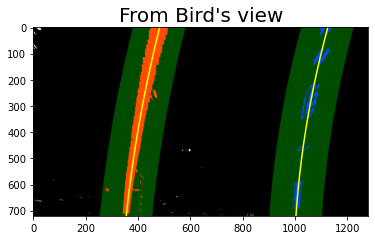

In [26]:
ll_f,rr_f,poly_img,final_img=process2(imageF,mtx,dist,l_fit=ll_f,r_fit=rr_f)
print(ll_f,rr_f)
plt.title("From Bird's view", fontsize=20)
plt.imshow(poly_img)

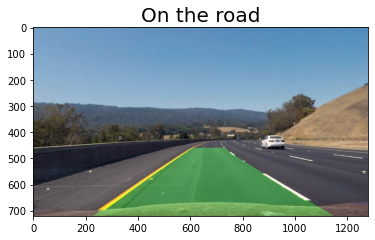

In [27]:
plt.title("On the road", fontsize=20)
plt.imshow(final_img)

In [28]:
left_curverad,right_curverad=measure_curvature_pixels(ll_f,rr_f,imageF.shape[0])
print("Curvature in pixels:")
print("Left: ",left_curverad)
print("Right: ", right_curverad)

Curvature in pixels:
Left:  4869.127776069533
Right:  3531.3615598723813


In [29]:
car_pos=calc_vehicle_pos(imageF,ll_f,rr_f,xm_per_pix)
print("The positon of the car is: ",car_pos," m")

The positon of the car is:  0.20691235193902083  m


## 4. test4.jpg

### Sliding Windows

[ 8.46146421e-05 -1.09848811e-01  4.11672107e+02] [ 3.34023784e-04 -3.36185061e-01  1.12291296e+03]


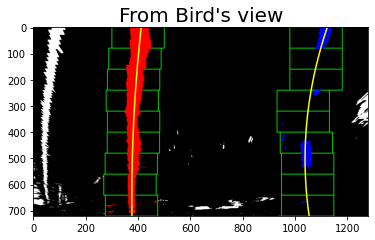

In [30]:
imageF = mpimg.imread('../test_images/test4.jpg')
ll_f,rr_f,poly_img,final_img=process2(imageF,mtx,dist)
print(ll_f,rr_f)
plt.title("From Bird's view", fontsize=20)
plt.imshow(poly_img)

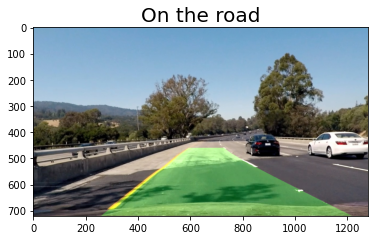

In [31]:
plt.title("On the road", fontsize=20)
plt.imshow(final_img)

In [32]:
left_curverad,right_curverad=measure_curvature_pixels(ll_f,rr_f,imageF.shape[0])
print("Curvature in pixels:")
print("Left: ",left_curverad)
print("Right: ", right_curverad)

Curvature in pixels:
Left:  5910.418389435158
Right:  1544.229674083176


In [33]:
car_pos=calc_vehicle_pos(imageF,ll_f,rr_f,xm_per_pix)
print("The positon of the car is: ",car_pos," m")

The positon of the car is:  0.3934960216118184  m


### From Prior data

[ 8.46146421e-05 -1.09848811e-01  4.11672107e+02] [ 3.34023784e-04 -3.36185061e-01  1.12291296e+03]


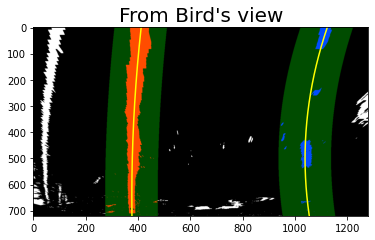

In [34]:
ll_f,rr_f,poly_img,final_img=process2(imageF,mtx,dist,l_fit=ll_f,r_fit=rr_f)
print(ll_f,rr_f)
plt.title("From Bird's view", fontsize=20)
plt.imshow(poly_img)

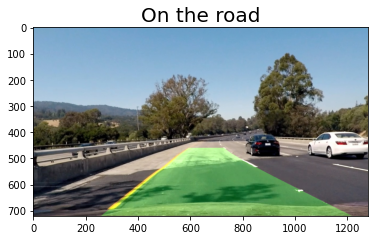

In [35]:
plt.title("On the road", fontsize=20)
plt.imshow(final_img)

In [36]:
left_curverad,right_curverad=measure_curvature_pixels(ll_f,rr_f,imageF.shape[0])
print("Curvature in pixels:")
print("Left: ",left_curverad)
print("Right: ", right_curverad)

Curvature in pixels:
Left:  5910.418389435158
Right:  1544.229674083176


In [37]:
car_pos=calc_vehicle_pos(imageF,ll_f,rr_f,xm_per_pix)
print("The positon of the car is: ",car_pos," m")

The positon of the car is:  0.3934960216118184  m


## 5. test5.jpg

### Sliding Windows

[ 3.17116985e-04 -3.34255129e-01  3.98982440e+02] [-2.52482583e-04  1.82336696e-01  9.97333767e+02]


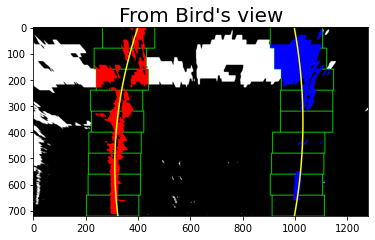

In [38]:
imageF = mpimg.imread('../test_images/test5.jpg')
ll_f,rr_f,poly_img,final_img=process2(imageF,mtx,dist)
print(ll_f,rr_f)
plt.title("From Bird's view", fontsize=20)
plt.imshow(poly_img)

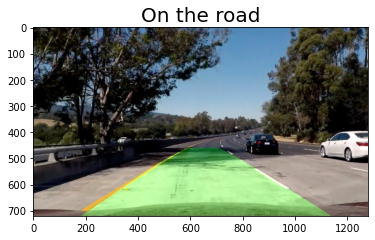

In [39]:
plt.title("On the road", fontsize=20)
plt.imshow(final_img)

In [40]:
left_curverad,right_curverad=measure_curvature_pixels(ll_f,rr_f,imageF.shape[0])
print("Curvature in pixels:")
print("Left: ",left_curverad)
print("Right: ", right_curverad)

Curvature in pixels:
Left:  1612.266423551214
Right:  2078.7044866287606


In [41]:
car_pos=calc_vehicle_pos(imageF,ll_f,rr_f,xm_per_pix)
print("The positon of the car is: ",car_pos," m")

The positon of the car is:  0.10419301474199148  m


### From Prior data

[ 3.17116985e-04 -3.34255129e-01  3.98982440e+02] [-2.52482583e-04  1.82336696e-01  9.97333767e+02]


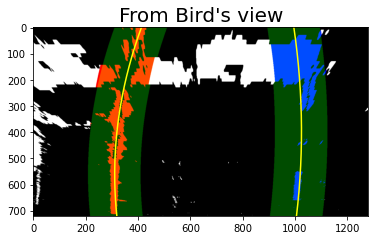

In [42]:
ll_f,rr_f,poly_img,final_img=process2(imageF,mtx,dist,l_fit=ll_f,r_fit=rr_f)
print(ll_f,rr_f)
plt.title("From Bird's view", fontsize=20)
plt.imshow(poly_img)

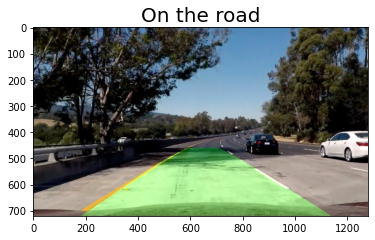

In [43]:
plt.title("On the road", fontsize=20)
plt.imshow(final_img)

In [44]:
left_curverad,right_curverad=measure_curvature_pixels(ll_f,rr_f,imageF.shape[0])
print("Curvature in pixels:")
print("Left: ",left_curverad)
print("Right: ", right_curverad)

Curvature in pixels:
Left:  1612.266423551214
Right:  2078.7044866287606


In [45]:
car_pos=calc_vehicle_pos(imageF,ll_f,rr_f,xm_per_pix)
print("The positon of the car is: ",car_pos," m")

The positon of the car is:  0.10419301474199148  m


## 6. test6.jpg

### Sliding Windows

[ 1.26233609e-04 -2.82755330e-01  5.07499976e+02] [ 1.63358971e-04 -2.81183877e-01  1.15443868e+03]


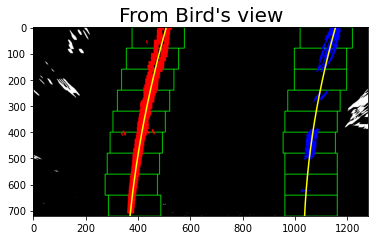

In [46]:
imageF = mpimg.imread('../test_images/test6.jpg')
ll_f,rr_f,poly_img,final_img=process2(imageF,mtx,dist)
print(ll_f,rr_f)
plt.title("From Bird's view", fontsize=20)
plt.imshow(poly_img)

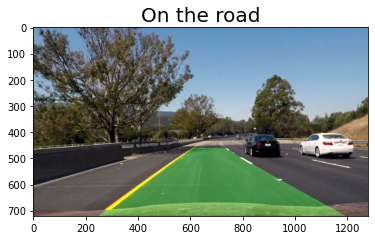

In [47]:
plt.title("On the road", fontsize=20)
plt.imshow(final_img)

In [48]:
left_curverad,right_curverad=measure_curvature_pixels(ll_f,rr_f,imageF.shape[0])
print("Curvature in pixels:")
print("Left: ",left_curverad)
print("Right: ", right_curverad)

Curvature in pixels:
Left:  4021.6470452860403
Right:  3070.4415751091847


In [49]:
car_pos=calc_vehicle_pos(imageF,ll_f,rr_f,xm_per_pix)
print("The positon of the car is: ",car_pos," m")

The positon of the car is:  0.3295941017127685  m


### From Prior data

[ 1.26233609e-04 -2.82755330e-01  5.07499976e+02] [ 1.63358971e-04 -2.81183877e-01  1.15443868e+03]


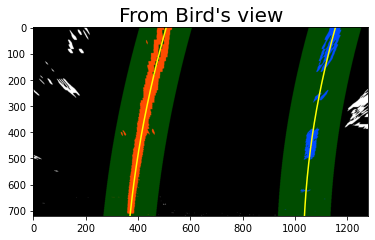

In [50]:
ll_f,rr_f,poly_img,final_img=process2(imageF,mtx,dist,l_fit=ll_f,r_fit=rr_f)
print(ll_f,rr_f)
plt.title("From Bird's view", fontsize=20)
plt.imshow(poly_img)

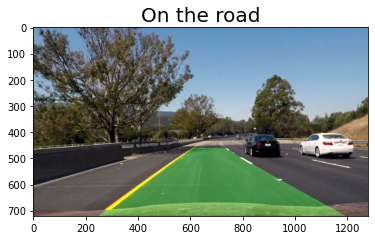

In [51]:
plt.title("On the road", fontsize=20)
plt.imshow(final_img)

In [52]:
left_curverad,right_curverad=measure_curvature_pixels(ll_f,rr_f,imageF.shape[0])
print("Curvature in pixels:")
print("Left: ",left_curverad)
print("Right: ", right_curverad)

Curvature in pixels:
Left:  4021.6470452860403
Right:  3070.4415751091847


In [53]:
car_pos=calc_vehicle_pos(imageF,ll_f,rr_f,xm_per_pix)
print("The positon of the car is: ",car_pos," m")

The positon of the car is:  0.3295941017127685  m


## 7. straight_lines1.jpg

### Sliding Windows

[-9.00075251e-06  1.66849800e-02  3.31140788e+02] [-4.35858513e-06  2.64925088e-03  9.75047981e+02]


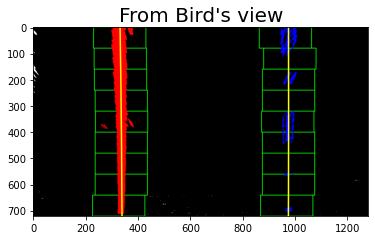

In [54]:
imageF = mpimg.imread('../test_images/straight_lines1.jpg')
ll_f,rr_f,poly_img,final_img=process2(imageF,mtx,dist)
print(ll_f,rr_f)
plt.title("From Bird's view", fontsize=20)
plt.imshow(poly_img)

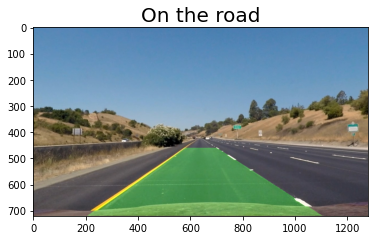

In [55]:
plt.title("On the road", fontsize=20)
plt.imshow(final_img)

In [56]:
left_curverad,right_curverad=measure_curvature_pixels(ll_f,rr_f,imageF.shape[0])
print("Curvature in pixels:")
print("Left: ",left_curverad)
print("Right: ", right_curverad)

Curvature in pixels:
Left:  55552.066338637575
Right:  114718.3897166758


In [57]:
car_pos=calc_vehicle_pos(imageF,ll_f,rr_f,xm_per_pix)
print("The positon of the car is: ",car_pos," m")

The positon of the car is:  0.08715077074569562  m


### From Prior data

[-9.00075251e-06  1.66849800e-02  3.31140788e+02] [-4.35858513e-06  2.64925088e-03  9.75047981e+02]


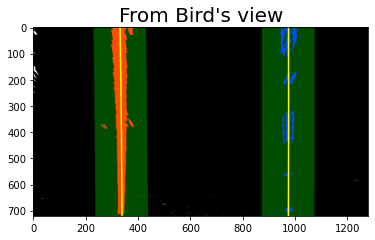

In [58]:
ll_f,rr_f,poly_img,final_img=process2(imageF,mtx,dist,l_fit=ll_f,r_fit=rr_f)
print(ll_f,rr_f)
plt.title("From Bird's view", fontsize=20)
plt.imshow(poly_img)

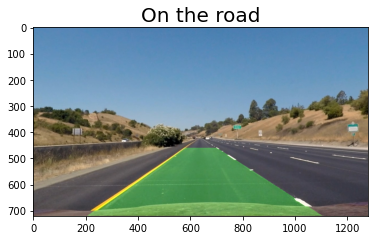

In [59]:
plt.title("On the road", fontsize=20)
plt.imshow(final_img)

In [60]:
left_curverad,right_curverad=measure_curvature_pixels(ll_f,rr_f,imageF.shape[0])
print("Curvature in pixels:")
print("Left: ",left_curverad)
print("Right: ", right_curverad)

Curvature in pixels:
Left:  55552.066338637575
Right:  114718.3897166758


In [61]:
car_pos=calc_vehicle_pos(imageF,ll_f,rr_f,xm_per_pix)
print("The positon of the car is: ",car_pos," m")

The positon of the car is:  0.08715077074569562  m


## 8. straight_lines2.jpg

### Sliding Windows

[-3.72888147e-06  3.57296786e-02  3.21285174e+02] [ 2.90519576e-06 -3.13642329e-02  9.98729085e+02]


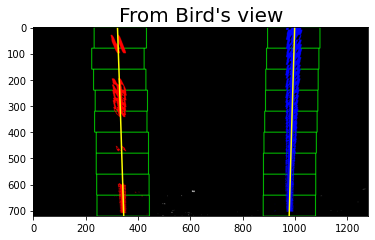

In [62]:
imageF = mpimg.imread('../test_images/straight_lines2.jpg')
ll_f,rr_f,poly_img,final_img=process2(imageF,mtx,dist)
print(ll_f,rr_f)
plt.title("From Bird's view", fontsize=20)
plt.imshow(poly_img)

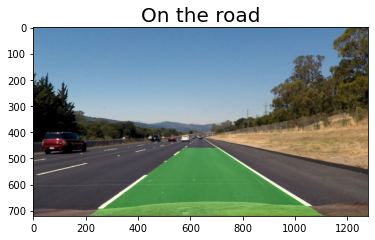

In [63]:
plt.title("On the road", fontsize=20)
plt.imshow(final_img)

In [64]:
left_curverad,right_curverad=measure_curvature_pixels(ll_f,rr_f,imageF.shape[0])
print("Curvature in pixels:")
print("Left: ",left_curverad)
print("Right: ", right_curverad)

Curvature in pixels:
Left:  134273.90075387643
Right:  172296.20244427823


In [65]:
car_pos=calc_vehicle_pos(imageF,ll_f,rr_f,xm_per_pix)
print("The positon of the car is: ",car_pos," m")

The positon of the car is:  0.11140958982146368  m


### From Prior data

[-3.72888147e-06  3.57296786e-02  3.21285174e+02] [ 2.90519576e-06 -3.13642329e-02  9.98729085e+02]


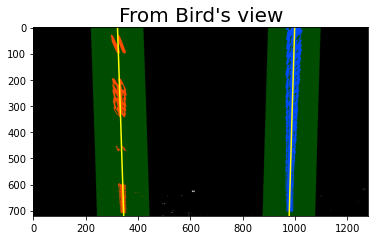

In [66]:
ll_f,rr_f,poly_img,final_img=process2(imageF,mtx,dist,l_fit=ll_f,r_fit=rr_f)
print(ll_f,rr_f)
plt.title("From Bird's view", fontsize=20)
plt.imshow(poly_img)

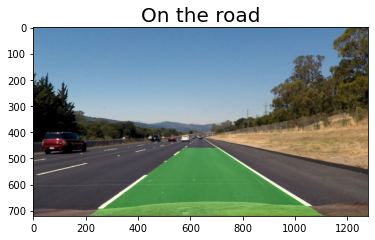

In [67]:
plt.title("On the road", fontsize=20)
plt.imshow(final_img)

In [68]:
left_curverad,right_curverad=measure_curvature_pixels(ll_f,rr_f,imageF.shape[0])
print("Curvature in pixels:")
print("Left: ",left_curverad)
print("Right: ", right_curverad)

Curvature in pixels:
Left:  134273.90075387643
Right:  172296.20244427823


In [69]:
car_pos=calc_vehicle_pos(imageF,ll_f,rr_f,xm_per_pix)
print("The positon of the car is: ",car_pos," m")

The positon of the car is:  0.11140958982146368  m


### 9. harder1.jpg

### Sliding Windows

[-7.98193086e-04  2.24459268e-01  5.59524403e+02] [-1.27931501e-03  9.25443592e-01  9.49351563e+02]


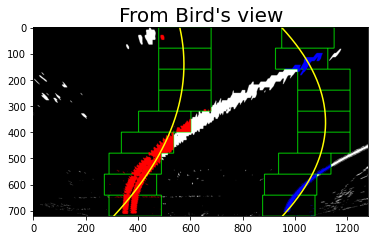

In [70]:
imageF = mpimg.imread('../test_images/harder1.jpg')
ll_f,rr_f,poly_img,final_img=process2(imageF,mtx,dist)
print(ll_f,rr_f)
plt.title("From Bird's view", fontsize=20)
plt.imshow(poly_img)

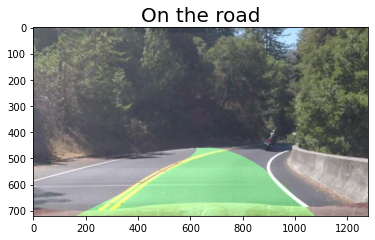

In [71]:
plt.title("On the road", fontsize=20)
plt.imshow(final_img)

In [72]:
left_curverad,right_curverad=measure_curvature_pixels(ll_f,rr_f,imageF.shape[0])
print("Curvature in pixels:")
print("Left: ",left_curverad)
print("Right: ", right_curverad)

Curvature in pixels:
Left:  1583.2795480630182
Right:  975.8535724170141


In [73]:
car_pos=calc_vehicle_pos(imageF,ll_f,rr_f,xm_per_pix)
print("The positon of the car is: ",car_pos," m")

The positon of the car is:  -0.056283444760375334  m


### From Prior data

[-7.98193086e-04  2.24459268e-01  5.59524403e+02] [-1.27931501e-03  9.25443592e-01  9.49351563e+02]


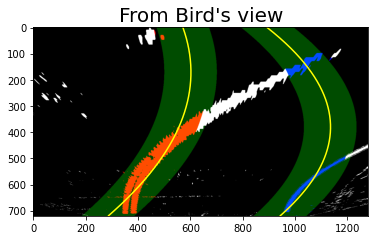

In [74]:
ll_f,rr_f,poly_img,final_img=process2(imageF,mtx,dist,l_fit=ll_f,r_fit=rr_f)
print(ll_f,rr_f)
plt.title("From Bird's view", fontsize=20)
plt.imshow(poly_img)

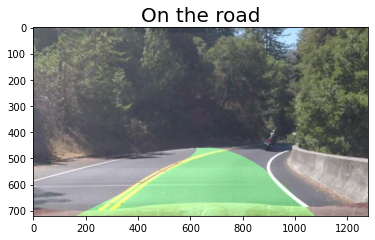

In [75]:
plt.title("On the road", fontsize=20)
plt.imshow(final_img)

In [76]:
left_curverad,right_curverad=measure_curvature_pixels(ll_f,rr_f,imageF.shape[0])
print("Curvature in pixels:")
print("Left: ",left_curverad)
print("Right: ", right_curverad)

Curvature in pixels:
Left:  1583.2795480630182
Right:  975.8535724170141


In [77]:
car_pos=calc_vehicle_pos(imageF,ll_f,rr_f,xm_per_pix)
print("The positon of the car is: ",car_pos," m")

The positon of the car is:  -0.056283444760375334  m
